In [3]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6


In [ ]:
import sys,os
os.getcwd()

In [13]:
# Time stamp convert to dates 

data = pd.read_csv('file01.csv')
data['Date'] = data['Timestamp'].apply(lambda x: x[:10])
data = data.drop(['Timestamp', 'From','To','Source'], axis = 1) 
data['index1'] = data.index

In [19]:
# From Dates get Avg min and max values 
Newdata = pd.DataFrame(data.groupby('Date')['Rate'].describe())
Newdata['Date'] = Newdata.index

In [48]:
Newdata.head()

,count,mean,std,min,25%,50%,75%,max,Date
Date,,,,,,,,,
2016-09-05,1440.0,18.111291,0.012402,18.082753,18.102438,18.111448,18.119947,18.139843,2016-09-05
2016-09-06,1440.0,18.068515,0.017824,18.027249,18.054774,18.067905,18.082420,18.108065,2016-09-06
2016-09-07,1440.0,18.062603,0.014554,18.026905,18.052181,18.062089,18.073641,18.096399,2016-09-07
2016-09-08,1440.0,18.114323,0.019921,18.069757,18.098285,18.114784,18.129563,18.157667,2016-09-08
2016-09-09,1440.0,18.179158,0.021075,18.132221,18.162456,18.179624,18.196030,18.225744,2016-09-09


In [65]:
Newdata.to_csv('Newfile.csv')

In [47]:
#Open and Close values to be done 

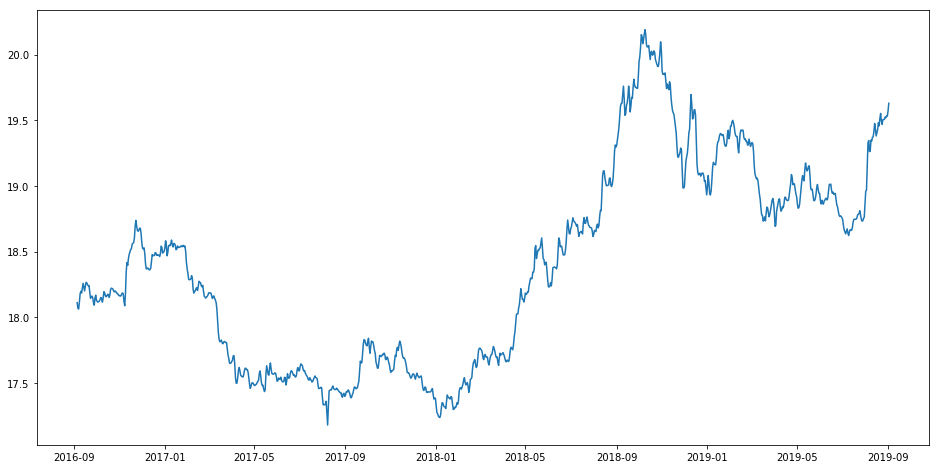

In [49]:
#setting index as date
Newdata['Date'] = pd.to_datetime(Newdata.Date,format='%Y-%m-%d')
Newdata.index = Newdata['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(Newdata['mean'], label='Avg Price history')

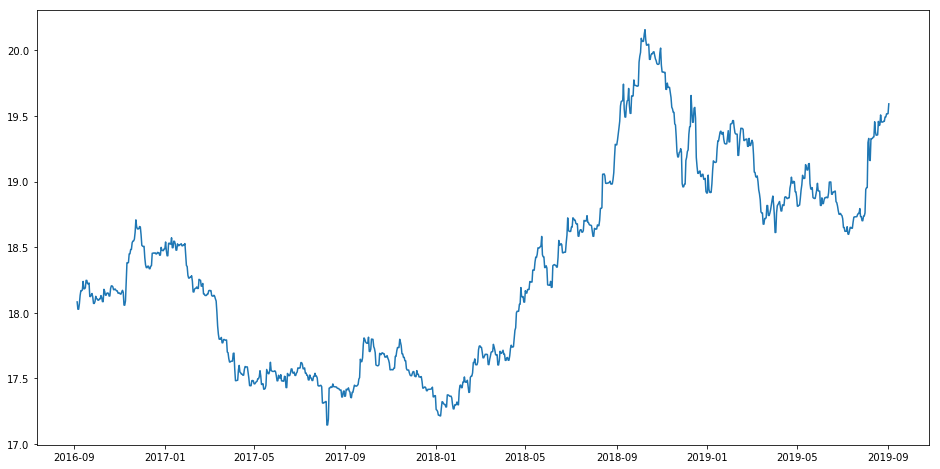

In [50]:
#plot
plt.figure(figsize=(16,8))
plt.plot(Newdata['min'], label='Min Price history')

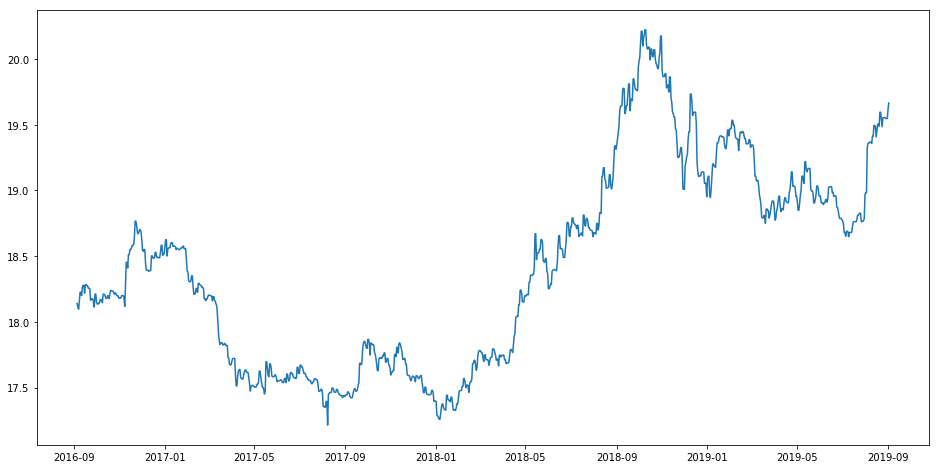

In [52]:
#plot
plt.figure(figsize=(16,8))
plt.plot(Newdata['max'], label='max Price history')

In [53]:
Newdata.count()

count    1084
mean     1084
std      1084
min      1084
25%      1084
50%      1084
75%      1084
max      1084
Date     1084
dtype: int64

In [54]:
!pip install fastai

  Could not find a version that satisfies the requirement torch>=1.0.0 (from fastai) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
No matching distribution found for torch>=1.0.0 (from fastai)


In [56]:
!pip install keras
!pip install theano

In [60]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler


In [61]:
from keras.models import Sequential


Using Theano backend.



You can find the C code in this temporary file: C:\Users\Manu\AppData\Local\Temp\theano_compilation_error_thp77_zd


AttributeError: module 'theano' has no attribute 'gof'

In [62]:
from keras.layers import Dense, Dropout, LSTM

Using Theano backend.



You can find the C code in this temporary file: C:\Users\Manu\AppData\Local\Temp\theano_compilation_error_o0uajiat


AttributeError: module 'theano' has no attribute 'gof'

In [58]:
!pip install theano

  Running setup.py bdist_wheel for theano: started
  Running setup.py bdist_wheel for theano: still running...
  Running setup.py bdist_wheel for theano: finished with status 'done'
  Stored in directory: C:\Users\Manu\AppData\Local\pip\Cache\wheels\88\fb\be\483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built theano


In [ ]:
#creating dataframe
data = Newdata.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(Newdata)),columns=['Date', 'mean'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['mean'][i] = data['mean'][i]


In [ ]:

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:700,:]
valid = dataset[700:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Avg_price = model.predict(X_test)
Avg_price = scaler.inverse_transform(Avg_price)